# Used Car Pricing Algorithm

## Missing

In [19]:
# calculate percent missing for each field in df
def percent_missing(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    # Rename the columns
    mis_val_table = mis_val_table.rename(
        columns={0: "Missing Values", 1: "% of Total Values"}
    )
    # Sort the table by percentage of missing descending
    mis_val_table = (
        mis_val_table[mis_val_table.iloc[:, 1] != 0]
        .sort_values("% of Total Values", ascending=False)
        .round(1)
    )
    # Print some summary information
    print(f"{mis_val_table.shape[0]} of {df.shape[1]} columns have missing values")
    # Return the dataframe with missing information
    return mis_val_table


In [28]:
# check for missing
print(percent_missing(train))
print(percent_missing(validate))
print(percent_missing(test))

19 of 58 columns have missing values
                     Missing Values  % of Total Values
body_subtype                3564345               80.1
hvf_optional                2790983               62.7
base_interior_color          968139               21.7
is_certified                 923956               20.8
hvf_standard                 826103               18.6
base_exterior_color          338201                7.6
engine_block                 266066                6.0
cylinders                    266065                6.0
engine_size                  264652                5.9
mpg                          190857                4.3
median_income                 32279                0.7
population_density            32279                0.7
median_home_value             32279                0.7
transmission                   1203                0.0
vehicle_type                    545                0.0
fuel_type                       399                0.0
doors                       

### Simple Handling

In [29]:
# certified
train["is_certified"].fillna(0, inplace=True)
validate["is_certified"].fillna(0, inplace=True)
test["is_certified"].fillna(0, inplace=True)

In [30]:
# location info missing
train = train[~train["zip"].isna()]
validate = validate[~validate["zip"].isna()]
test = test[~test["zip"].isna()]

In [40]:
# body subtype missing
train["is_certified"].fillna("None", inplace=True)
validate["is_certified"].fillna("None", inplace=True)
test["is_certified"].fillna("None", inplace=True)

### Impute Mode for Categoricals

In [35]:
# create for grouping
train['make_model_trim'] = train['make'] + ' / ' + train['model'] + ' / ' + train['trim']
validate['make_model_trim'] = validate['make'] + ' / ' + validate['model'] + ' / ' + validate['trim']
test['make_model_trim'] = test['make'] + ' / ' + test['model'] + ' / ' + test['trim']

In [34]:
# categoricals
categoricals = ["base_interior_color","base_exterior_color","engine_block"
                ,"transmission","vehicle_type","fuel_type","body_type"
                ,"drivetrain"]
group = 'make_model_trim'
for cat in categoricals:
    train[cat] = train.groupby(group)[cat].transform(lambda x: x.fillna(x.mode().iloc[0] if len(x.mode()) > 0 else 'Unknown'))
    validate[cat] = validate[group].map(train.groupby(group)[cat].apply(lambda x: x.mode()[0]))
    test[cat] = test[group].map(train.groupby(group)[cat].apply(lambda x: x.mode()[0]))

### Impute Median for Numerics

In [36]:
# numerics
numerics = ["cylinders","engine_size","mpg","doors"]
groups = ["make_model_trim","engine_size","cylinders","body_type"]
for group in groups:
    for num in numerics:
        train[num] = train.groupby(group)[num].transform(lambda x: x.fillna(x.median()))
        validate[num] = validate[group].map(train.groupby(group)[num].median())
        test[num] = test[group].map(train.groupby(group)[num].median())

In [37]:
# remove grouping
train = train.drop(columns='make_model_trim')
validate = validate.drop(columns='make_model_trim')
test = test.drop(columns='make_model_trim')

### Impute Median for Zip Features

In [38]:
from sklearn.impute import SimpleImputer

# fit a median imputer on train
imputer = SimpleImputer(strategy='median')
imputer.fit(train[['population_density', 'median_income', 'median_home_value']])

# apply the median impute
train[['population_density', 'median_income', 'median_home_value']] = imputer.transform(train[['population_density', 'median_income', 'median_home_value']])
validate[['population_density', 'median_income', 'median_home_value']] = imputer.transform(validate[['population_density', 'median_income', 'median_home_value']])
test[['population_density', 'median_income', 'median_home_value']] = imputer.transform(test[['population_density', 'median_income', 'median_home_value']])


In [39]:
# check for missing
print(percent_missing(train))
print(percent_missing(validate))
print(percent_missing(test))

3 of 58 columns have missing values
              Missing Values  % of Total Values
body_subtype         3564280               80.1
hvf_optional         2790929               62.7
hvf_standard          826079               18.6
3 of 58 columns have missing values
              Missing Values  % of Total Values
body_subtype         1023707               80.1
hvf_optional          802093               62.7
hvf_standard          238110               18.6
3 of 58 columns have missing values
              Missing Values  % of Total Values
body_subtype          504216               80.1
hvf_optional          394953               62.7
hvf_standard          116792               18.5


## EDA

In [41]:
train.columns

Index(['mvr_price', 'make', 'model', 'trim', 'mvr_model_year', 'mvr_mileage',
       'age_months', 'vehicle_type', 'body_type', 'body_subtype', 'drivetrain',
       'fuel_type', 'engine_block', 'engine_size', 'transmission', 'doors',
       'cylinders', 'base_exterior_color', 'base_interior_color',
       'is_certified', 'zip', 'mvr_state', 'hvf_standard', 'hvf_optional',
       'mvr_purchase_date', 'make_model_encode', 'make_model_trim_encode',
       'mvr_purchase_month', 'monthly_mileage', 'mpg', 'population_density',
       'median_income', 'median_home_value', 'mvr_purchase_yearmonth',
       'used_car_price_index', 'new_car_price_index', 'gas_price_index',
       'consumer_sentiment_index', 'hvf_opt_missing', 'hvf_std_missing',
       'hvf_opt_comp_0', 'hvf_opt_comp_1', 'hvf_opt_comp_2', 'hvf_opt_comp_3',
       'hvf_opt_comp_4', 'hvf_opt_comp_5', 'hvf_opt_comp_6', 'hvf_opt_comp_7',
       'hvf_opt_comp_8', 'hvf_all_comp_0', 'hvf_all_comp_1', 'hvf_all_comp_2',
       'hvf_all_com

In [49]:
# numerics correlations with target
correlations = train.corr(method="pearson", numeric_only=True)["mvr_price"].sort_values(ascending=False)
correlations

mvr_price                   1.000000
make_model_trim_encode      0.815970
make_model_encode           0.723281
mvr_model_year              0.554421
hvf_all_comp_0              0.544098
engine_size                 0.528696
cylinders                   0.498184
used_car_price_index        0.294117
new_car_price_index         0.279147
gas_price_index             0.255726
hvf_all_comp_2              0.236434
hvf_all_comp_6              0.184695
hvf_all_comp_5              0.184531
hvf_opt_comp_7              0.134540
is_certified                0.124132
hvf_opt_comp_0              0.120883
hvf_all_comp_3              0.092443
median_home_value           0.078317
median_income               0.077814
hvf_all_comp_7              0.057093
hvf_opt_comp_5              0.042269
hvf_opt_comp_8              0.036862
hvf_opt_comp_4              0.011774
hvf_all_comp_8              0.001112
doors                      -0.005576
hvf_opt_comp_3             -0.014476
hvf_opt_comp_2             -0.017497
h

engine_size       AxesSubplot(0.125,0.125;0.227941x0.755)
mvr_mileage    AxesSubplot(0.398529,0.125;0.227941x0.755)
age_months     AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

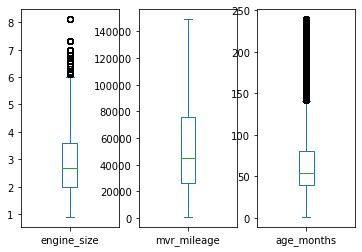

In [44]:
# boxplots of numeric variables
train[[
 'engine_size',
 'mvr_mileage',
 'age_months']].plot(kind='box', subplots=True, layout=(1,3), sharex=False, sharey=False)

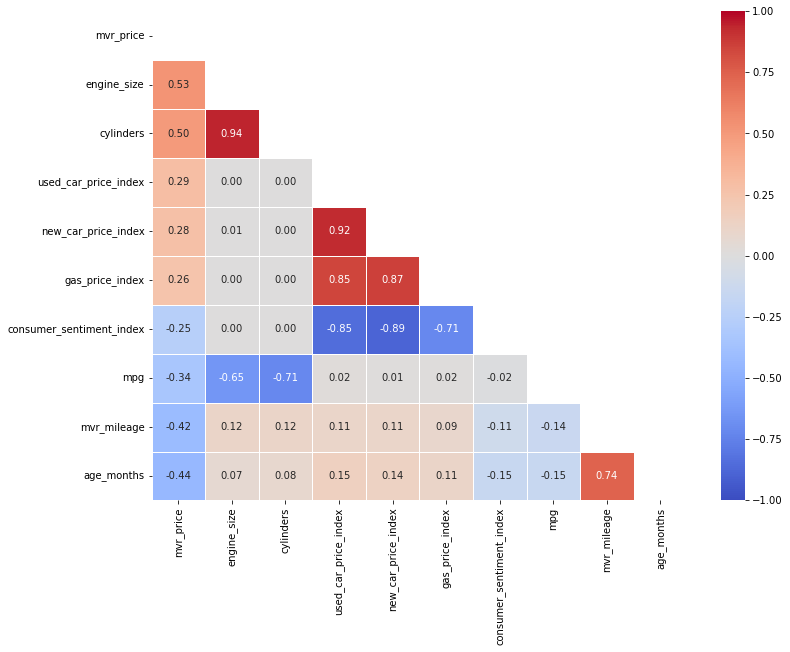

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_graph = ['mvr_price',
 'engine_size',
 'cylinders',
 'used_car_price_index',
 'new_car_price_index',
 'gas_price_index',
 'consumer_sentiment_index',
 'mpg',
 'mvr_mileage',
 'age_months']

corr_matrix = train[corr_graph].corr(numeric_only=True)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 9))

sns.heatmap(
    corr_matrix,
    mask=mask,        # Mask the upper triangle of the correlation matrix
    annot=True,       # Display the correlation coefficients
    fmt=".2f",        # Format the correlation coefficients to 2 decimal places
    cmap="coolwarm",  # Choose a color palette for the heatmap
    vmin=-1,          # Set the minimum value for the color scale
    vmax=1,           # Set the maximum value for the color scale
    linewidths=.5,    # Add a small space between the cells for better readability
)

# Display the heatmap
plt.show()


## Pre-Modeling EDA

In [57]:
print_shape(train)
train.sample(5).T


Rows: 4,451,874 
Columns: 58


,5423727,5461848,4091100,3845265,1650204
mvr_price,30250.0,21291.0,63793.0,28498.410156,14900.44043
make,Ford,Nissan,Ford,Mercedes-Benz,Ford
model,Explorer,Rogue,F-150,GLC,Mustang
trim,Sport,SL,XLT,GLC300,EcoBoost
mvr_model_year,2016,2016,2021,2016,2019
mvr_mileage,43045.0,28738.0,15972.0,47422.0,17681.0
age_months,47,44,29,81,54
vehicle_type,Truck,Truck,Truck,Truck,Car
body_type,SUV,SUV,Pickup,SUV,Coupe
body_subtype,None,None,Crew,None,None


## Checkpoint

In [ ]:
working_dir = "/data/p_dsi/capstone_projects/shea/working/"
train.to_pickle(working_dir + "train.pkl")
validate.to_pickle(working_dir + "validate.pkl")
test.to_pickle(working_dir + "test.pkl")

In [1]:
import numpy as np
import pandas as pd

In [6]:
working_dir = "/data/p_dsi/capstone_projects/shea/working/"
train = pd.read_pickle(working_dir + "train.pkl")
validate = pd.read_pickle(working_dir + "validate.pkl")
test = pd.read_pickle(working_dir + "test.pkl")